In [48]:
from PathPlanningEnv import PathPlanningEnv
from FCNN import FCNN
from Q_Network import Q_Network
from run import TrainMemorize, TrainQlearning, PlayOnce
from utility import MovingAveragePlot
import settings
from matplotlib import pyplot as plt

In [49]:
model_settings = {
    'height' : 10,
    'width' : 10,
    'obs_count' : 5,
    'random_seed' : 42
}

env = PathPlanningEnv(**model_settings)
env.display()
print(env.distances)

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
tensor([[  4.,   3.,   4., 100.,   8.,   7.,   8.,   9.,  10.,  11.],
        [  3.,   2.,   3.,   4., 100.,   6.,   7.,   8.,   9.,  10.],
        [  2.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
        [  1.,   0.,   1.,   2.,   3., 100.,   7.,   8.,   9.,  10.],
        [  2.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
        [  3.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [  4.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.],


In [50]:
input_dim = 3 * model_settings['height'] * model_settings['width'] + 4
network_fcnn = FCNN(input_dim)
network_conv = Q_Network(BatchSize = 1, MapHeight = 10, MapWidth = 10, Covn1OutChan = 32, Conv1Kernel = 5, Covn2OutChan = 32, Conv2Kernel = 3, HiddenSize = 50)

In [52]:
config = settings.Config()
rewards, losses = TrainMemorize(network_fcnn, env, config)

play round: 100, ave reward (last 100): 0.4000
play round: 200, ave reward (last 100): 0.8400
play round: 300, ave reward (last 100): 0.7600
play round: 400, ave reward (last 100): 0.9400
play round: 500, ave reward (last 100): 0.9400
play round: 600, ave reward (last 100): 0.9000
play round: 700, ave reward (last 100): 0.8600
play round: 800, ave reward (last 100): 0.9400
play round: 900, ave reward (last 100): 0.9000
play round: 1000, ave reward (last 100): 0.9000


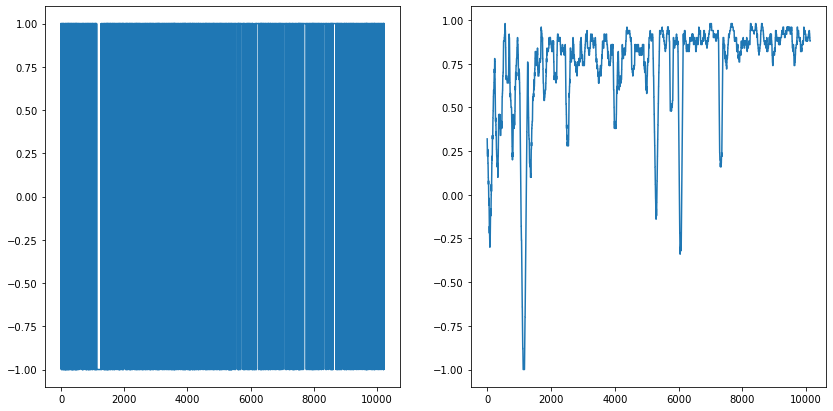

In [5]:
MovingAveragePlot(rewards, 100)

In [6]:
print(env.foot_prints)

[[  17   13    2    0  167   49   28    2    4    0]
 [  48   79   50   38    0   99   61   36   29    4]
 [ 106  910  912  969 1028 1058  995 1022 1069   30]
 [ 159 1000   82   62   37    0   74   43   28    5]
 [ 107   56   54   52   54   58   57    0    1    8]
 [  78   22    8    6    6    4    2    1    1    4]
 [  72   13    5    2    4    3    2    2    2    3]
 [  57    7    3    1    1    0    0    0    0    0]
 [  76    0    1    1    0    0    0    0    0    0]
 [  60    7    1    1    0    0    0    0    0    0]]


In [7]:
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  -0.8461 -0.9910 1.0249 -0.9201  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', '

In [8]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 4,
    init_col = 9,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  -0.0781 0.1729 0.4502 -0.5533  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' 

In [9]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 1,
    init_col = 9,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  -0.2523 0.3350 0.8880 -0.5323  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', 'P', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' 

In [10]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 0,
    init_col = 5,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', 'P', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  -0.5658 0.2272 -0.0251 -0.9496  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', 'P', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', '

In [11]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 1,
    init_col = 0,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
['P', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.1137 0.8320 0.4434 -0.4382  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
['P', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' '

## Q-learning

In [12]:
model_settings = {
    'height' : 10,
    'width' : 10,
    'obs_count' : 5,
    'random_seed' : 42
}

env = PathPlanningEnv(**model_settings)
env.display()
print(env.distances)

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
tensor([[  4.,   3.,   4., 100.,   8.,   7.,   8.,   9.,  10.,  11.],
        [  3.,   2.,   3.,   4., 100.,   6.,   7.,   8.,   9.,  10.],
        [  2.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
        [  1.,   0.,   1.,   2.,   3., 100.,   7.,   8.,   9.,  10.],
        [  2.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
        [  3.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [  4.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.],


In [13]:
input_dim = 3 * model_settings['height'] * model_settings['width'] + 4
network_fcnn = FCNN(input_dim)

In [29]:
config = settings.Config(epsilon=0.9, epsilon_low = 0.3, epsilon_step = 0.01, max_play_length=500, epochs = 10000, gamma = 0.99)
rewards, losses = TrainQlearning(network_fcnn, env, config)

play round: 100, ave reward (last 100): 0.8182
play round: 200, ave reward (last 100): 0.7862
play round: 300, ave reward (last 100): 0.7986
play round: 400, ave reward (last 100): 0.8300
play round: 500, ave reward (last 100): 0.7574
play round: 600, ave reward (last 100): 0.9361
play round: 700, ave reward (last 100): 0.7575
play round: 800, ave reward (last 100): 0.9309
play round: 900, ave reward (last 100): 0.9410
play round: 1000, ave reward (last 100): 0.9698
play round: 1100, ave reward (last 100): 0.8977
play round: 1200, ave reward (last 100): 0.9438
play round: 1300, ave reward (last 100): 0.9271
play round: 1400, ave reward (last 100): 0.9602
play round: 1500, ave reward (last 100): 0.9441
play round: 1600, ave reward (last 100): 0.9598
play round: 1700, ave reward (last 100): 0.9549
play round: 1800, ave reward (last 100): 0.9440
play round: 1900, ave reward (last 100): 0.9565
play round: 2000, ave reward (last 100): 0.9339
play round: 2100, ave reward (last 100): 0.9362
p

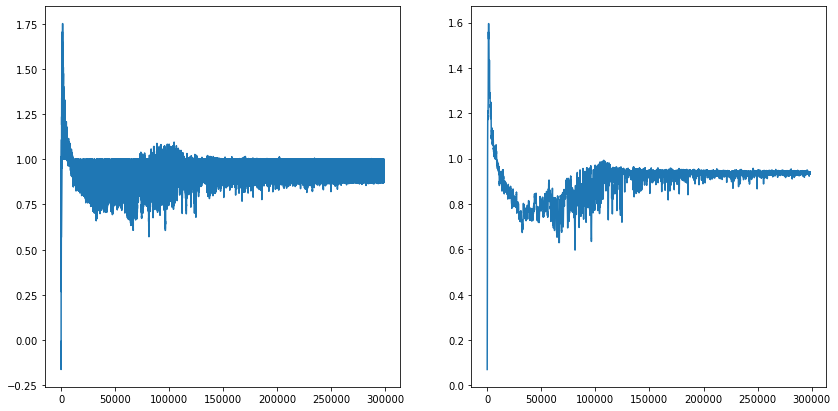

In [30]:
MovingAveragePlot(rewards, 100)

In [31]:
print(env.foot_prints)

[[  840  1188  1048     0  2676  1574  2233  1849  1293  2365]
 [  780  1312   824   826     0  1497  1590  1906  1173  1772]
 [  577  1047  1344  1595  1069  1339  1543  1441   810  1055]
 [  902  9975 10585  9205  2308     0  1450  1457  1083  1214]
 [  722  1748  5764  9055  9782  5298  2306  1849  1907  2002]
 [  838   944  4528  4945 10064 10529  5641  5616  1952  1695]
 [  912   661  1256  1229  3616  7147  2810  5952  2582  2079]
 [ 1137   747  1009   923  2824  6371  7284 11204  8719  8318]
 [ 1511     0   842   712  2410  2725  2667  6294  3869  9942]
 [  808  1160  1465   803     0  1274  1797  6608  7384 15522]]


In [32]:
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
state-action rewards:  0.8778 0.8708 0.8790 0.8689  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ',

In [33]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 4,
    init_col = 9,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8850 0.8827 0.8891 0.8805  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ',

In [34]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 1,
    init_col = 9,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 19
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', 

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 40
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', 

state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 60
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 61
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', 

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 81
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', 

state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 100
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 101
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' '

state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 120
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 121
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' '

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 141
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 161
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 180
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 199
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 218
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 240
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 260
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 280
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 298
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 299
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' '

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 317
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 338
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 357
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 375
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 376
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' '

state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 397
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 398
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' '

[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 417
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 418
[' ', ' '

[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 440
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ',

[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 458
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 459
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' '

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8837 0.8637 0.8809 0.8826  
Step 479
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 480
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' '

Step 497
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8702 0.8744 0.8615 0.8629  
Step 498
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'P']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', 

In [35]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 0,
    init_col = 5,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', 'P', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.8609 0.8766 0.8759 0.8660  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', 'P', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ',

In [36]:
env = PathPlanningEnv(
    grid = env.grid[2,:,:],
    init_row = 1,
    init_col = 0,
    goal_row = env.goal_row,
    goal_col = env.goal_col
)
PlayOnce(network_fcnn, env, config)

Step 0
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
['P', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
state-action rewards:  0.9443 0.9511 0.9452 0.9427  
Step 1
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ']
['P', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'T', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', 'O', ' ',

Check rewards

In [37]:
import numpy as np
for i in range(10):
    for j in range(10):
        old_obs = env.grid[2,:,:]
        goal_row = env.goal_row
        goal_col = env.goal_col
        env._init_from_grid(old_obs, i, j, goal_row, goal_col)

        if env.grid[2, i, j] == 0:
            preds = []
            state = env.grid
            for action in env.actions:
                pred = network_fcnn(state, action)
                preds.append(pred)

            print("{:.2f}".format(max(preds).item()), end = " ")
        else:
            print("xxxx", end = " ")

    print(" ")

0.93 0.92 0.89 xxxx 0.87 0.88 0.88 0.88 0.89 0.87  
0.95 0.93 0.92 0.91 xxxx 0.90 0.89 0.88 0.90 0.88  
0.98 1.00 0.99 0.98 0.97 0.93 0.88 0.88 0.89 0.88  
0.99 0.96 1.00 0.99 0.98 xxxx 0.90 0.92 0.91 0.89  
0.98 1.00 0.99 0.98 0.97 0.96 0.95 0.94 0.91 0.89  
0.97 0.98 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.89  
0.94 0.95 0.97 0.96 0.95 0.94 0.93 0.92 0.92 0.91  
0.93 0.91 0.95 0.93 0.94 0.93 0.92 0.91 0.90 0.90  
0.89 xxxx 0.90 0.89 0.93 0.92 0.92 0.91 0.90 0.89  
0.89 0.89 0.88 0.88 xxxx 0.92 0.91 0.90 0.89 0.88  


In [38]:
def PlotVectorField(env: PathPlanningEnv, width, height):

    fig = plt.subplots(figsize=(width, height))
    ax = plt.axes(xlim=(-1, width - 1 + 1), ylim=(-1, height - 1 + 1))
    tgtPoint, = ax.plot(env.goal_col, height - 1 - env.goal_row, linestyle='', markersize=20, marker='o', color=(0.5, 0.5, 1.0, 0.75))

    # obstacles
    for i in range(height):
        for j in range(width):
            if env.grid[2, i, j] == 1:
                obs_row = height - 1 - i
                obs_col = j
                obsstaclePoint, = ax.plot(obs_col, obs_row, linestyle='', markersize=15, marker='x', markeredgewidth=2, color='r')

    # vector field
    for i in range(height):
        for j in range(width):
            old_obs = env.grid[2,:,:]
            goal_row = env.goal_row
            goal_col = env.goal_col
            env._init_from_grid(old_obs, i, j, goal_row, goal_col)
            state = env.grid
            if env.grid[2, i, j] == 0:
                state = env.grid
                preds = []
                state = env.grid
                for action in env.actions:
                    pred = network_fcnn(state, action)
                    pred_list = pred.detach().numpy().tolist()
                    preds.append(pred_list)
                max_index = preds.index(max(preds))
                max_reward = max(preds)

                x = j  # x coordinates
                y = height - 1 - i  # y coordinates
                if max_index == 0: # go up
                    u = [0]  # x component of SVF
                    v = max_reward  # y component of SVF
                elif max_index == 1: # go down
                    u = [0]  
                    v= [i * (-1) for i in max_reward]
                elif max_index == 2: # go left
                    u = [i * (-1) for i in max_reward]
                    v = [0]  
                else: # go right
                    u = max_reward  # 
                    v = [0]  
                Q1 = ax.quiver(x, y, u, v, color=(0, 0.2, 0), scale_units='xy', scale=2, headwidth=0.5);

    plt.xticks([]);
    plt.yticks([]);

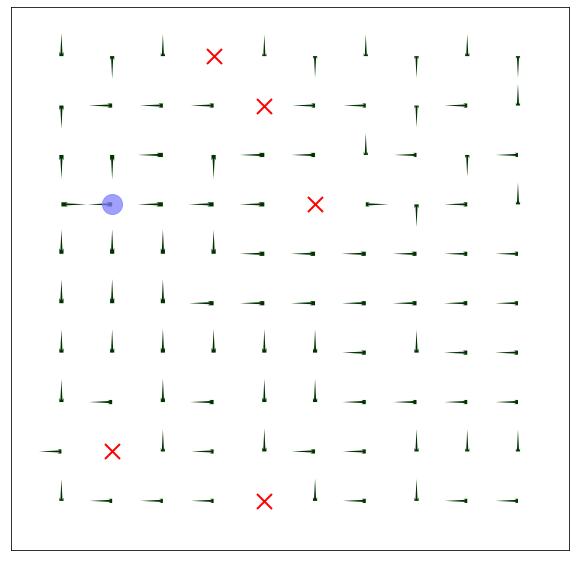

In [39]:
PlotVectorField(env, model_settings['width'], model_settings['height'])